In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# Load the datasets
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data

def load():
    data = pd.read_csv("titanic.csv")
    return data

(17474, 122)


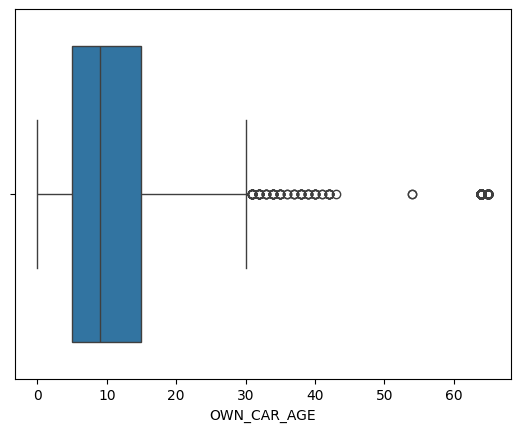

(891, 12)


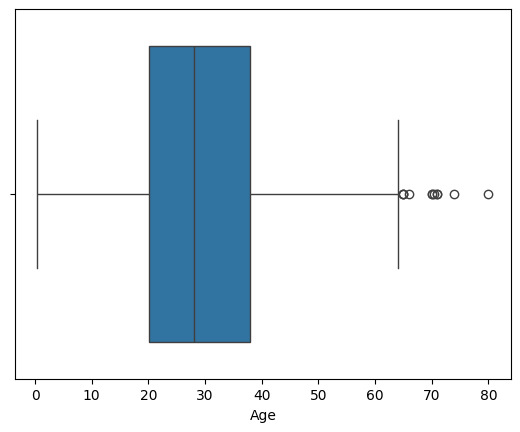

In [4]:
# See the shape of the datasets
df_application = load_application_train()
print(df_application.shape)  # (307511, 122)
sns.boxplot(x=df_application["OWN_CAR_AGE"])
plt.show()

df_titanic = load()
print(df_titanic.shape)  # (891, 12)
sns.boxplot(x=df_titanic["Age"])
plt.show()

In [5]:
# Data Preprocessing for application_train dataset

# Handle Missing Values
# For numerical features
num_imputer = SimpleImputer(strategy='mean')
numerical_columns = df_application.select_dtypes(include=[np.number]).columns
df_application[numerical_columns] = num_imputer.fit_transform(df_application[numerical_columns])

# For categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df_application.select_dtypes(include=[object]).columns
for column in categorical_columns:
    df_application[column] = cat_imputer.fit_transform(df_application[[column]]).ravel()

# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_application[column] = label_encoder.fit_transform(df_application[column])

# Detect and Remove Outliers using LOF
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df_application[numerical_columns])
mask = outliers != -1
df_application = df_application[mask]

# Scale Numerical Features
scaler = StandardScaler()
df_application[numerical_columns] = scaler.fit_transform(df_application[numerical_columns])

# Feature Selection (if needed)
X_application = df_application.drop('TARGET', axis=1)
y_application = df_application['TARGET']

best_features_application = SelectKBest(score_func=f_classif, k='all')
fit_application = best_features_application.fit(X_application, y_application)
df_scores_application = pd.DataFrame(fit_application.scores_)
df_columns_application = pd.DataFrame(X_application.columns)

feature_scores_application = pd.concat([df_columns_application, df_scores_application], axis=1)
feature_scores_application.columns = ['Feature', 'Score']
print(feature_scores_application)


                        Feature      Score
0                    SK_ID_CURR   0.010848
1            NAME_CONTRACT_TYPE  24.070083
2                   CODE_GENDER  57.855825
3                  FLAG_OWN_CAR   2.212562
4               FLAG_OWN_REALTY   2.182475
..                          ...        ...
116   AMT_REQ_CREDIT_BUREAU_DAY   4.296080
117  AMT_REQ_CREDIT_BUREAU_WEEK   1.029948
118   AMT_REQ_CREDIT_BUREAU_MON   2.763377
119   AMT_REQ_CREDIT_BUREAU_QRT   0.539060
120  AMT_REQ_CREDIT_BUREAU_YEAR   7.444032

[121 rows x 2 columns]


<ipython-input-5-b70dc8b5021d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application[numerical_columns] = scaler.fit_transform(df_application[numerical_columns])
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 95 103 105] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [6]:
# Final Data Preparation
X_application = df_application.drop('TARGET', axis=1)
y_application = df_application['TARGET']

In [7]:
# Data Preprocessing for titanic dataset

# Handle Missing Values
# For numerical features
numerical_columns_titanic = df_titanic.select_dtypes(include=[np.number]).columns
df_titanic[numerical_columns_titanic] = num_imputer.fit_transform(df_titanic[numerical_columns_titanic])

# For categorical features
categorical_columns_titanic = df_titanic.select_dtypes(include=[object]).columns
for column in categorical_columns_titanic:
    df_titanic[column] = cat_imputer.fit_transform(df_titanic[[column]]).ravel()

# Encode Categorical Variables
for column in categorical_columns_titanic:
    df_titanic[column] = label_encoder.fit_transform(df_titanic[column])

# Detect and Remove Outliers using LOF
outliers_titanic = lof.fit_predict(df_titanic[numerical_columns_titanic])
mask_titanic = outliers_titanic != -1
df_titanic = df_titanic[mask_titanic]

# Scale Numerical Features
df_titanic[numerical_columns_titanic] = scaler.fit_transform(df_titanic[numerical_columns_titanic])

# Feature Selection (if needed)
X_titanic = df_titanic.drop('Survived', axis=1)
y_titanic = df_titanic['Survived']

best_features_titanic = SelectKBest(score_func=f_classif, k='all')
fit_titanic = best_features_titanic.fit(X_titanic, y_titanic)
df_scores_titanic = pd.DataFrame(fit_titanic.scores_)
df_columns_titanic = pd.DataFrame(X_titanic.columns)

feature_scores_titanic = pd.concat([df_columns_titanic, df_scores_titanic], axis=1)
feature_scores_titanic.columns = ['Feature', 'Score']
print(feature_scores_titanic)

        Feature       Score
0   PassengerId    0.289820
1        Pclass   86.048540
2          Name    2.787366
3           Sex  324.103107
4           Age    6.483032
5         SibSp    2.180161
6         Parch    5.746599
7        Ticket   22.830404
8          Fare   55.558396
9         Cabin   31.375437
10     Embarked   19.793207


<ipython-input-7-ba9c8807da10>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic[numerical_columns_titanic] = scaler.fit_transform(df_titanic[numerical_columns_titanic])


In [8]:
# Final Data Preparation
X_titanic = df_titanic.drop('Survived', axis=1)
y_titanic = df_titanic['Survived']